### Exercise 4

Implement your own linear SVM for the non-separable case. Please do not use any pre-built SVM implementations.


1. Start with writing down the quadratic programming formulation (see section 11 slide 31) for the primal problem. Describe how you choose Q, c, A, b, $A_{eq}$, $b_{eq}$, $x_{l}$, $x_{u}$.

<b>Primal SVM optimization problem:</b>
    
   minimize $|| w ||^{2} + C \sum ξ_{i}^{p}$
   
   s.t. $y_{i}(w·x_{i} + b)≥ 1 − ξ_{i}$, 
        
   $ξ_{i} ≥ 0$

<b>Quadratic programming formulation for primal optimization problem: </b>

minimize $ \frac{1}{2} x^{T}Qx + c^{T}x$

s.t. Ax ≤ b

$A_{eq}x = b_{eq}$

$x_{l} ≤ x ≤ x_{u}$


2. Generate training data using the following code snippet:

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
np.random.seed(123)
x1 = np.random.randn(2, 20)
x2 = np.random.randn(2, 20) + 2
y1, y2 = np.ones(20), -np.ones(20)
X_train = np.hstack([x1, x2]).T
y_train = np.hstack([y1, y2]).T

In [7]:
X_train[:5]

array([[-1.0856306 ,  0.73736858],
       [ 0.99734545,  1.49073203],
       [ 0.2829785 , -0.93583387],
       [-1.50629471,  1.17582904],
       [-0.57860025, -1.25388067]])

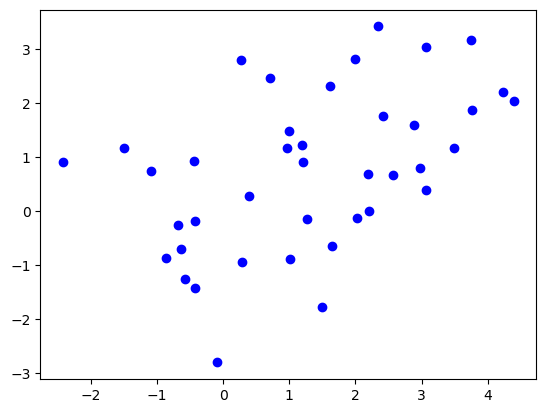

In [34]:
for i in range(len(X_train)):
    plt.scatter(X_train[i][0], X_train[i][1], c = 'blue')
plt.show()

In [11]:
y_train[:5]

array([1., 1., 1., 1., 1.])

3. Solve the quadratic programming problem for the given training data. You can use the quadprog function from the lecture

In [45]:
# Setting parameters
learning_rate = 0.001
C = 0.01 

def svm(x, y):
    w = np.zeros(x.shape[1])
    b = 0

    for i in range(1000):
        for i in range(0, len(x) - 1):
            if y[i] * (np.dot(x[i], w) - b) >= 1:
                w -= learning_rate * (2 * C * w)
            else:
                w -= learning_rate * (2 * C * w - np.dot(x[i], y[i]))
                b -= learning_rate * y[i]
    
    predictions = np.sign(np.dot(x, w) - b)
    
    return predictions, w, b

In [47]:
y_pred, w, b = svm(X_train, y_train)

4. Visualize the training data and plot the decision boundary.

<b> training data </b>

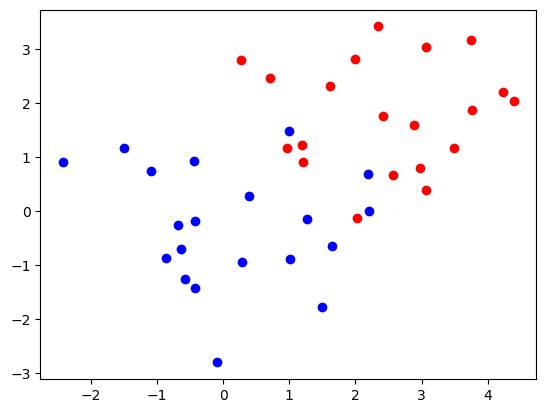

In [49]:
for i in range(len(X_train)):
    if y_train[i] == 1:
        plt.scatter(X_train[i][0], X_train[i][1], c = 'blue')
    else:
        plt.scatter(X_train[i][0], X_train[i][1], c = 'red')
plt.show()

<b> predictions </b>

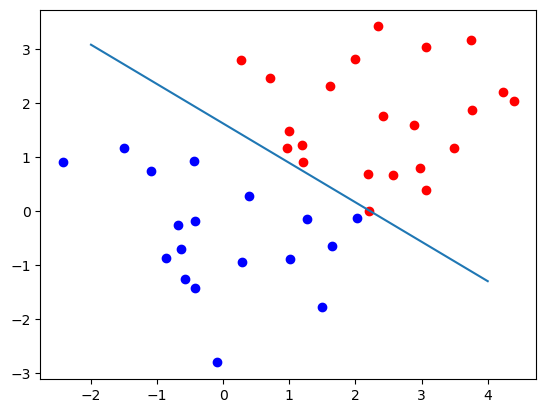

In [62]:
for i in range(len(X_train)):
    if y_pred[i] == 1:
        plt.scatter(X_train[i][0], X_train[i][1], c = 'blue')
    else:
        plt.scatter(X_train[i][0], X_train[i][1], c = 'red')

plt.plot(np.linspace(-2, 4), (-w[0]/w[1]) * np.linspace(-2, 4) - b)
plt.show()